In [5]:
from google.colab import files

from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

In [7]:
df = pd.read_excel("/content/drive/MyDrive/Proyecto Integrador (1)/transcripts.xlsx", header=0, dtype=str)
df.head()

date sequence      name n_utterance      section  \
0  19760329        1     BURNS           1  TRANSCRIPTS   
1  19760329        2  OCONNELL           1  TRANSCRIPTS   
2  19760329        3     BURNS           2  TRANSCRIPTS   
3  19760329        4  COLDWELL           1  TRANSCRIPTS   
4  19760329        5  OCONNELL           2  TRANSCRIPTS   

                                                text  
0  Gentlemen, we're ready. This will now be a mee...  
1  Yes, Mr. Chairman. The Committee will recall t...  
2  Thank you, Mr. O'Connell. Are there any questi...  
3  One question, Tom. Do you gather any sense or ...  
4  Mr. Chairman, Governor, we've had no conversat...

**Instrucciones copiadas directamente de la página**

**date** is the date of the FOMC meeting

**sequence** this orders each speaker utterance within the meeting

**name** is the last name of the speaker

**n_utterance** which utterance by the current speaker within the meeting (e.g. the tenth time Greenspan spoke is 10)

**section** in which section of the meeting was the current utternance a part of (either ECSIT for the discussion of the economic situation, MPS for a discussion of monetary policy, or AGGREGATES for biannual discussions of the monetary aggregates. See the paper for details. Note: In the paper I used these values from Hansen, McMahon, and Prat, but I did this starting in 1995 myself in this file.

**text** the text of the utterance

In [ ]:
#Si se va a trabajar solo con el texto, se eliminan las demás columnas
df_texto = df.drop(columns=["sequence","name","n_utterance","section"])
df_texto

date                                               text
0       19760329  Gentlemen, we're ready. This will now be a mee...
1       19760329  Yes, Mr. Chairman. The Committee will recall t...
2       19760329  Thank you, Mr. O'Connell. Are there any questi...
3       19760329  One question, Tom. Do you gather any sense or ...
4       19760329  Mr. Chairman, Governor, we've had no conversat...
...          ...                                                ...
143264  20191211  Thank you very much, John. Do I have a motion ...
143265  20191211                   With great enthusiasm, so moved.
143266  20191211                                          A second?
143267  20191211                                            Second.
143268  20191211  Without objection. Lorie, congratulations. [Ap...

[143269 rows x 2 columns]

In [ ]:
#agrupamos el texto por fechas, revisando primero que no haya nulls, eliminando los existentes
df_texto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143269 entries, 0 to 143268
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    143269 non-null  object
 1   text    143239 non-null  object
dtypes: object(2)
memory usage: 2.2+ MB


In [ ]:
df_limpio = df_texto.dropna()
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143239 entries, 0 to 143268
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    143239 non-null  object
 1   text    143239 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [ ]:
df_limpio["date"] = pd.to_datetime(df_limpio["date"], format="%Y%m%d", errors="coerce")
df_limpio.head()

/tmp/ipython-input-905182224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio["date"] = pd.to_datetime(df_limpio["date"], format="%Y%m%d", errors="coerce")


date                                               text
0 1976-03-29  Gentlemen, we're ready. This will now be a mee...
1 1976-03-29  Yes, Mr. Chairman. The Committee will recall t...
2 1976-03-29  Thank you, Mr. O'Connell. Are there any questi...
3 1976-03-29  One question, Tom. Do you gather any sense or ...
4 1976-03-29  Mr. Chairman, Governor, we've had no conversat...

In [ ]:
df_transcripts = df_limpio.groupby("date")["text"].apply(lambda x: " ".join(x.astype(str))).reset_index()

In [ ]:
df_transcripts.head(1) #son documentos muy largos, así que se recomienda ver solo 1 a la vez

date                                               text
0 1976-03-29  Gentlemen, we're ready. This will now be a mee...

In [ ]:
#si nos fijamos en las transcripciones detalladamente, podemos ver que cuentan con las fechas y números de página del documento que seguramente
#estaban a pie de página, en el formato 3/29/76 -2-.
#asimismo, hay corchetes encerrando palabras
import re

In [ ]:
reggex = r"\b\d{1,2}/\d{1,2}/\d{2}\s*-\s*\d+\s*-"
df_transcripts["text"] = df_transcripts["text"].str.replace(reggex, "", regex=True)
df_transcripts.head(1)

date                                               text
0 1976-03-29  Gentlemen, we're ready. This will now be a mee...

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
mystopwords = stopwords.words("english")
print(mystopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
#dejamos finalmente solo las palabras del texto
def clean_tok(text):
    words = re.sub(r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]', ' ', text).lower()   # Solo consideramos caracteres letras, observa que lo extendemos al español.
    words = re.sub(r'\s{2,}', ' ', words.strip())      # Eliminemos espacios en blanco extras entre palabras o al inicio o final de cada frase.
    words = re.findall(r'\b[a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]{2,}\b', words)  #eliminar palabras de un solo carácter
    tokens = [palabra for palabra in words if palabra not in mystopwords] #eliminar stopwords

    return tokens

In [ ]:
# Aplicamos el proceso de limpieza y tokenización:

df_transcripts["tokens"] = df_transcripts["text"].apply(lambda x: clean_tok(x))

In [ ]:
df_transcripts

date                                               text  \
0   1976-03-29  Gentlemen, we're ready. This will now be a mee...   
1   1976-04-20  All right, gentlemen, we'll get our meeting un...   
2   1976-05-18  Gentlemen, we'll get our meeting under way. Du...   
3   1976-06-22  Gentlemen, we have a special meeting, and our ...   
4   1976-07-20  Gentlemen, we have a brief meeting scheduled f...   
..         ...                                                ...   
361 2019-06-19  Good morning, everyone. Let’s get started. Thi...   
362 2019-07-31  Good morning, everyone. PARTICIPANTS. Good mor...   
363 2019-09-18  Okay. Good morning, everyone. This meeting, as...   
364 2019-10-30  Good morning, everyone. PARTICIPANTS. Good mor...   
365 2019-12-11  Good morning, everyone. This meeting, as usual...   

                                                tokens  
0    [gentlemen, ready, meeting, federal, open, mar...  
1    [right, gentlemen, get, meeting, way, know, sc...  
2    [gentlemen, get, meeting, way, past, two, thre...  
3    [gentlemen, special, meeting, newest, governor...  
4    [gentlemen, brief, meeting, scheduled, afterno...  
..                                                 ...  
361  [good, morning, everyone, let, get, started, m...  
362  [good, morning, everyone, participants, good, ...  
363  [okay, good, morning, everyone, meeting, usual...  
364  [good, morning, everyone, participants, good, ...  
365  [good, morning, everyone, meeting, usual, join...  

[366 rows x 3 columns]

In [ ]:
#Con la parte de texto integrada, ahora integramos el excel con las tasa de la fed
df_tasas = pd.read_excel("/content/drive/MyDrive/Proyecto Integrador/FED tasas.xlsx", header=0)
df_tasas

Fecha  Tipos de interés  Cambio tipo de Interés
0  1991-03-08            0.0600                     NaN
1  1991-04-30            0.0575                 -0.0025
2  1991-08-06            0.0550                 -0.0025
3  1991-09-13            0.0525                 -0.0025
4  1991-10-31            0.0500                 -0.0025
..        ...               ...                     ...
78 2018-09-27            0.0200                  0.0025
79 2018-12-20            0.0225                  0.0025
80 2019-08-01            0.0200                 -0.0025
81 2019-09-19            0.0175                 -0.0025
82 2019-10-31            0.0150                 -0.0025

[83 rows x 3 columns]

In [ ]:
df_tasas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha                   83 non-null     datetime64[ns]
 1   Tipos de interés        83 non-null     float64       
 2   Cambio tipo de Interés  82 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.1 KB


In [ ]:
df_tasas["Fecha"] = pd.to_datetime(df_tasas["Fecha"])
df_tasas = df_tasas.rename(columns={'Fecha': 'date'})

In [ ]:
df_tasas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    83 non-null     datetime64[ns]
 1   Tipos de interés        83 non-null     float64       
 2   Cambio tipo de Interés  82 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.1 KB


In [ ]:
#modificamos el transcript para dejar solo aquellos en el periodo 1991-2019
df_transcripts = df_transcripts[df_transcripts["date"] >= "1991-03-07"]
df_transcripts = df_transcripts[df_transcripts["date"] <= "2019-10-31"]
df_transcripts

date                                               text  \
135 1991-03-26  This is the first time in a long time that [th...   
136 1991-05-14  Are there any comments raised by the report on...   
137 1991-07-03  [Statement--see Appendix.] Questions for Sam? ...   
138 1991-08-20  Good morning, everyone. Would somebody like to...   
139 1991-10-01  Good morning, everyone. We have Tom Hoenig wit...   
..         ...                                                ...   
360 2019-05-01  Good morning, everyone. PARTICIPANTS. Good mor...   
361 2019-06-19  Good morning, everyone. Let’s get started. Thi...   
362 2019-07-31  Good morning, everyone. PARTICIPANTS. Good mor...   
363 2019-09-18  Okay. Good morning, everyone. This meeting, as...   
364 2019-10-30  Good morning, everyone. PARTICIPANTS. Good mor...   

                                                tokens  
135  [first, time, long, time, committee, membershi...  
136  [comments, raised, report, examination, system...  
137  [statement, see, appendix, questions, sam, lee...  
138  [good, morning, everyone, would, somebody, lik...  
139  [good, morning, everyone, tom, hoenig, us, off...  
..                                                 ...  
360  [good, morning, everyone, participants, good, ...  
361  [good, morning, everyone, let, get, started, m...  
362  [good, morning, everyone, participants, good, ...  
363  [okay, good, morning, everyone, meeting, usual...  
364  [good, morning, everyone, participants, good, ...  

[230 rows x 3 columns]

In [ ]:
df_FED = pd.merge_asof(
    df_transcripts.sort_values("date"),
    df_tasas.sort_values("date"),
    on="date",
    direction="forward"
)
df_FED.head()

date                                               text  \
0  1991-03-26  This is the first time in a long time that [th...   
1  1991-05-14  Are there any comments raised by the report on...   
2  1991-07-03  [Statement--see Appendix.] Questions for Sam? ...   
3  1991-08-20  Good morning, everyone. Would somebody like to...   
4  1991-10-01  Good morning, everyone. We have Tom Hoenig wit...   
5  1991-11-05  We need to approve the minutes. Without object...   
6  1991-12-17  Before we get started with our agenda, I'd lik...   
7  1992-02-05  If we can get started.... I'd like first to we...   
8  1992-03-31  I wanted to welcome Jerry Jordan to his first ...   
9  1992-05-19  Good morning, everyone. Would somebody like to...   
10 1992-07-01  Let's start with foreign currency operations. ...   
11 1992-08-18  So moved. Is there a second? Without objection...   
12 1992-10-06  I think it is most appropriate for me to comme...   
13 1992-11-17  Good morning, everybody. The first item of bus...   
14 1992-12-22  Good morning, everyone. I think you all know w...   
15 1993-02-03  Even though I have no legal authority at the m...   
16 1993-03-23  Good morning, everyone. The usual procedure, a...   
17 1993-05-18  Good morning, everyone. There are going to be ...   
18 1993-07-07  The staff has circulated a memorandum [on a mo...   
19 1993-08-17  Good morning, everyone. The first item, which ...   

                                               tokens  Tipos de interés  \
0   [first, time, long, time, committee, membershi...            0.0575   
1   [comments, raised, report, examination, system...            0.0550   
2   [statement, see, appendix, questions, sam, lee...            0.0550   
3   [good, morning, everyone, would, somebody, lik...            0.0525   
4   [good, morning, everyone, tom, hoenig, us, off...            0.0500   
5   [need, approve, minutes, without, objection, t...            0.0475   
6   [get, started, agenda, like, welcome, two, new...            0.0400   
7   [get, started, like, first, welcome, bill, mcd...            0.0375   
8   [wanted, welcome, jerry, jordan, first, meetin...            0.0375   
9   [good, morning, everyone, would, somebody, lik...            0.0325   
10  [let, start, foreign, currency, operations, mr...            0.0325   
11  [moved, second, without, objection, thank, muc...            0.0300   
12  [think, appropriate, comment, far, judge, hand...            0.0325   
13  [good, morning, everybody, first, item, busine...            0.0325   
14  [good, morning, everyone, think, know, luncheo...            0.0325   
15  [even, though, legal, authority, moment, call,...            0.0325   
16  [good, morning, everyone, usual, procedure, kn...            0.0325   
17  [good, morning, everyone, going, thunderstorms...            0.0325   
18  [staff, circulated, memorandum, monetary, aggr...            0.0325   
19  [good, morning, everyone, first, item, agenda,...            0.0325   

    Cambio tipo de Interés  
0                  -0.0025  
1                  -0.0025  
2                  -0.0025  
3                  -0.0025  
4                  -0.0025  
5                  -0.0025  
6                  -0.0050  
7                  -0.0025  
8                  -0.0025  
9                  -0.0050  
10                 -0.0050  
11                 -0.0025  
12                  0.0025  
13                  0.0025  
14                  0.0025  
15                  0.0025  
16                  0.0025  
17                  0.0025  
18                  0.0025  
19                  0.0025

In [ ]:
df_FED['Cambio tasa de interés'] = df_FED['Tipos de interés'].diff()

In [ ]:
df_FED

date                                               text  \
0   1991-03-26  This is the first time in a long time that [th...   
1   1991-05-14  Are there any comments raised by the report on...   
2   1991-07-03  [Statement--see Appendix.] Questions for Sam? ...   
3   1991-08-20  Good morning, everyone. Would somebody like to...   
4   1991-10-01  Good morning, everyone. We have Tom Hoenig wit...   
..         ...                                                ...   
225 2019-05-01  Good morning, everyone. PARTICIPANTS. Good mor...   
226 2019-06-19  Good morning, everyone. Let’s get started. Thi...   
227 2019-07-31  Good morning, everyone. PARTICIPANTS. Good mor...   
228 2019-09-18  Okay. Good morning, everyone. This meeting, as...   
229 2019-10-30  Good morning, everyone. PARTICIPANTS. Good mor...   

                                                tokens  Tipos de interés  \
0    [first, time, long, time, committee, membershi...            0.0575   
1    [comments, raised, report, examination, system...            0.0550   
2    [statement, see, appendix, questions, sam, lee...            0.0550   
3    [good, morning, everyone, would, somebody, lik...            0.0525   
4    [good, morning, everyone, tom, hoenig, us, off...            0.0500   
..                                                 ...               ...   
225  [good, morning, everyone, participants, good, ...            0.0200   
226  [good, morning, everyone, let, get, started, m...            0.0200   
227  [good, morning, everyone, participants, good, ...            0.0200   
228  [okay, good, morning, everyone, meeting, usual...            0.0175   
229  [good, morning, everyone, participants, good, ...            0.0150   

     Cambio tipo de Interés  Cambio tasa de interés  
0                   -0.0025                     NaN  
1                   -0.0025                 -0.0025  
2                   -0.0025                  0.0000  
3                   -0.0025                 -0.0025  
4                   -0.0025                 -0.0025  
..                      ...                     ...  
225                 -0.0025                  0.0000  
226                 -0.0025                  0.0000  
227                 -0.0025                  0.0000  
228                 -0.0025                 -0.0025  
229                 -0.0025                 -0.0025  

[230 rows x 6 columns]

In [ ]:
df_FED = df_FED.drop("Cambio tipo de Interés", axis = 1)
df_FED

date                                               text  \
0   1991-03-26  This is the first time in a long time that [th...   
1   1991-05-14  Are there any comments raised by the report on...   
2   1991-07-03  [Statement--see Appendix.] Questions for Sam? ...   
3   1991-08-20  Good morning, everyone. Would somebody like to...   
4   1991-10-01  Good morning, everyone. We have Tom Hoenig wit...   
..         ...                                                ...   
225 2019-05-01  Good morning, everyone. PARTICIPANTS. Good mor...   
226 2019-06-19  Good morning, everyone. Let’s get started. Thi...   
227 2019-07-31  Good morning, everyone. PARTICIPANTS. Good mor...   
228 2019-09-18  Okay. Good morning, everyone. This meeting, as...   
229 2019-10-30  Good morning, everyone. PARTICIPANTS. Good mor...   

                                                tokens  Tipos de interés  \
0    [first, time, long, time, committee, membershi...            0.0575   
1    [comments, raised, report, examination, system...            0.0550   
2    [statement, see, appendix, questions, sam, lee...            0.0550   
3    [good, morning, everyone, would, somebody, lik...            0.0525   
4    [good, morning, everyone, tom, hoenig, us, off...            0.0500   
..                                                 ...               ...   
225  [good, morning, everyone, participants, good, ...            0.0200   
226  [good, morning, everyone, let, get, started, m...            0.0200   
227  [good, morning, everyone, participants, good, ...            0.0200   
228  [okay, good, morning, everyone, meeting, usual...            0.0175   
229  [good, morning, everyone, participants, good, ...            0.0150   

     Cambio tasa de interés  
0                       NaN  
1                   -0.0025  
2                    0.0000  
3                   -0.0025  
4                   -0.0025  
..                      ...  
225                  0.0000  
226                  0.0000  
227                  0.0000  
228                 -0.0025  
229                 -0.0025  

[230 rows x 5 columns]

In [ ]:
#multiplicamos para dejarlo en porcentajes
df_FED["Tipos de interés"] = df_FED["Tipos de interés"]*100
df_FED["Cambio tasa de interés"] = df_FED["Cambio tasa de interés"]*100
df_FED

date                                               text  \
0   1991-03-26  This is the first time in a long time that [th...   
1   1991-05-14  Are there any comments raised by the report on...   
2   1991-07-03  [Statement--see Appendix.] Questions for Sam? ...   
3   1991-08-20  Good morning, everyone. Would somebody like to...   
4   1991-10-01  Good morning, everyone. We have Tom Hoenig wit...   
..         ...                                                ...   
225 2019-05-01  Good morning, everyone. PARTICIPANTS. Good mor...   
226 2019-06-19  Good morning, everyone. Let’s get started. Thi...   
227 2019-07-31  Good morning, everyone. PARTICIPANTS. Good mor...   
228 2019-09-18  Okay. Good morning, everyone. This meeting, as...   
229 2019-10-30  Good morning, everyone. PARTICIPANTS. Good mor...   

                                                tokens  Tipos de interés  \
0    [first, time, long, time, committee, membershi...              5.75   
1    [comments, raised, report, examination, system...              5.50   
2    [statement, see, appendix, questions, sam, lee...              5.50   
3    [good, morning, everyone, would, somebody, lik...              5.25   
4    [good, morning, everyone, tom, hoenig, us, off...              5.00   
..                                                 ...               ...   
225  [good, morning, everyone, participants, good, ...              2.00   
226  [good, morning, everyone, let, get, started, m...              2.00   
227  [good, morning, everyone, participants, good, ...              2.00   
228  [okay, good, morning, everyone, meeting, usual...              1.75   
229  [good, morning, everyone, participants, good, ...              1.50   

     Cambio tasa de interés  
0                       NaN  
1                     -0.25  
2                      0.00  
3                     -0.25  
4                     -0.25  
..                      ...  
225                    0.00  
226                    0.00  
227                    0.00  
228                   -0.25  
229                   -0.25  

[230 rows x 5 columns]

In [ ]:
#Análisis de datos

In [ ]:
import matplotlib.pyplot as plt

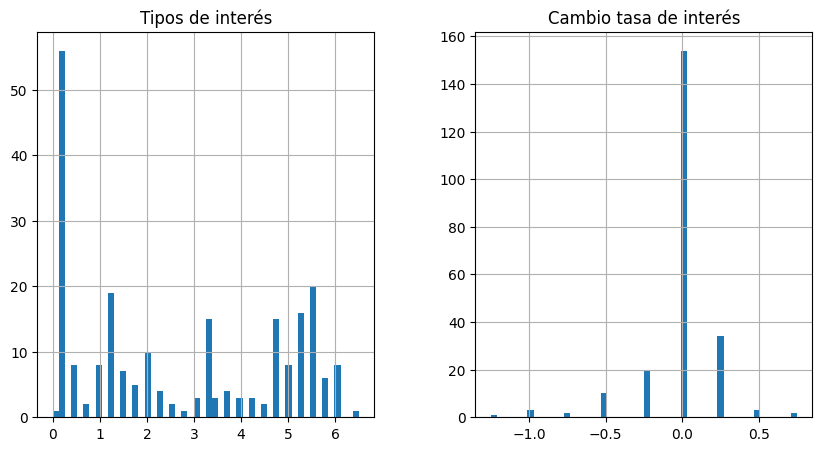

In [ ]:
df_FED[["Tipos de interés","Cambio tasa de interés"]].hist(bins=50, figsize=(10,5))
plt.show()